In [166]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [167]:
dictionnaire={'country':['France','Spain','Germany','Spain','Germany','France','Spain','France','Germany','France'],
             'age':[44,27,30,38,40,35,'NaN',48,50,37],
            'salary':[72000,48000,54000,61000,'NaN',58000,52000,79000,83000,67000],
             'achete':['No','Yes','No','No','Yes','Yes','No','Yes','No','Yes']}

In [168]:
dictionnaire

{'country': ['France',
  'Spain',
  'Germany',
  'Spain',
  'Germany',
  'France',
  'Spain',
  'France',
  'Germany',
  'France'],
 'age': [44, 27, 30, 38, 40, 35, 'NaN', 48, 50, 37],
 'salary': [72000,
  48000,
  54000,
  61000,
  'NaN',
  58000,
  52000,
  79000,
  83000,
  67000],
 'achete': ['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes']}

In [169]:
data=pd.DataFrame(dictionnaire)
data

,country,age,salary,achete
0,France,44,72000,No
1,Spain,27,48000,Yes
2,Germany,30,54000,No
3,Spain,38,61000,No
4,Germany,40,NaN,Yes
5,France,35,58000,Yes
6,Spain,NaN,52000,No
7,France,48,79000,Yes
8,Germany,50,83000,No
9,France,37,67000,Yes


In [170]:
X=data.iloc[:,:-1].values
X

array([['France', 44, 72000],
       ['Spain', 27, 48000],
       ['Germany', 30, 54000],
       ['Spain', 38, 61000],
       ['Germany', 40, 'NaN'],
       ['France', 35, 58000],
       ['Spain', 'NaN', 52000],
       ['France', 48, 79000],
       ['Germany', 50, 83000],
       ['France', 37, 67000]], dtype=object)

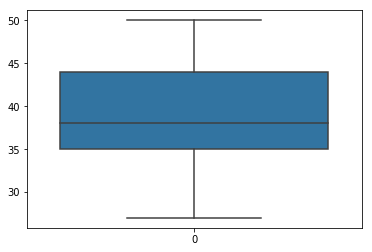

In [171]:
sns.boxplot(data=data['age'])

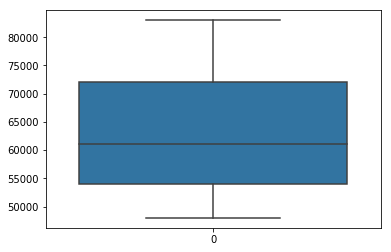

In [172]:
sns.boxplot(data=data['salary'])

In [173]:
y=data.iloc[:,-1].values
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

# Imputation de données Maquantes:

## 1) Par la moyenne
Si notre dataset n'a pas d'outliers, on remplace de données manquantes par la moyenne. Sinon, on fait une autre stratégie

## 2) Par la mediane 
S'il y a des outliers, on remplace de données manquantes par la mediane.

## 3) Par le mode
En cas de variables catégorielles

In [174]:
data.isna().sum()

country    0
age        0
salary     0
achete     0
dtype: int64

In [175]:
from sklearn.preprocessing import Imputer

In [176]:
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)

In [177]:
imputer.fit(X[:,1:3])

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [178]:
X

array([['France', 44, 72000],
       ['Spain', 27, 48000],
       ['Germany', 30, 54000],
       ['Spain', 38, 61000],
       ['Germany', 40, 'NaN'],
       ['France', 35, 58000],
       ['Spain', 'NaN', 52000],
       ['France', 48, 79000],
       ['Germany', 50, 83000],
       ['France', 37, 67000]], dtype=object)

In [179]:
X[:,1:3]=imputer.transform(X[:,1:3])

In [180]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

# Codification de variables

In [181]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#### On codifie la colone Country

In [182]:
labelencoder_X=LabelEncoder()
X[:,0]=labelencoder_X.fit_transform(X[:,0])

In [183]:
X

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

In [184]:
onehotencoder=OneHotEncoder(categorical_features=[0])

In [185]:
X=onehotencoder.fit_transform(X).toarray()

In [186]:
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.40000000e+01,
        7.20000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.70000000e+01,
        4.80000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.00000000e+01,
        5.40000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.80000000e+01,
        6.10000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.00000000e+01,
        6.37777778e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50000000e+01,
        5.80000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.87777778e+01,
        5.20000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.80000000e+01,
        7.90000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 5.00000000e+01,
        8.30000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.70000000e+01,
        6.70000000e+04]])

In [187]:
labelencoder_y=LabelEncoder()
y=labelencoder_y.fit_transform(y)

In [188]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int32)

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2 )

In [191]:
from sklearn.preprocessing import StandardScaler

In [192]:
sc=StandardScaler()

In [193]:
X_train=sc.fit_transform(X_train)

In [194]:
X_train

array([[ 1.        , -0.57735027, -0.57735027, -0.80667524, -0.72132045],
       [ 1.        , -0.57735027, -0.57735027,  0.61764507,  0.58171004],
       [ 1.        , -0.57735027, -0.57735027,  1.25067632,  1.23322529],
       [-1.        ,  1.73205081, -0.57735027, -1.5979643 , -1.09361488],
       [-1.        , -0.57735027,  1.73205081, -0.3319018 , -0.44209963],
       [-1.        , -0.57735027,  1.73205081, -0.20881239, -1.27976209],
       [ 1.        , -0.57735027, -0.57735027, -0.49015961,  0.11634201],
       [-1.        ,  1.73205081, -0.57735027,  1.56719195,  1.60551972]])